### Geographical Distribution of Cuisines -  Identify geographical trends in cuisine preferences or availability, such as if certain cuisines are more dominant or preferred in specific areas.

In [65]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('restaurants_data/popular_restaurants.csv')

import ast
df['categories'] = df['categories'].apply(ast.literal_eval)
df['coordinates'] = df['coordinates'].apply(ast.literal_eval)


category_aliases = {
    'Indian': ['indpak'],
    'Italian': ['italian', 'abruzzese', 'altoatesine', 'apulian', 'calabrian', 'cucinacampana', 'emilian', 'friulan', 'ligurian', 'lumbard', 'napoletana', 'piemonte', 'roman', 'sardinian', 'sicilian', 'tuscan', 'venetian'],
    'Mexican': ['mexican', 'easternmexican', 'jaliscan', 'northernmexican', 'oaxacan', 'pueblan', 'tacos', 'tamales', 'yucatan'],
    'Chinese': ['chinese', 'cantonese', 'congee', 'dimsum', 'fuzhou', 'hainan', 'hakka', 'henghwa', 'hokkien', 'hunan', 'pekinese', 'shanghainese', 'szechuan', 'teochew'],
    'Japanese': ['japanese', 'blowfish', 'conveyorsushi', 'donburi', 'gyudon', 'oyakodon', 'handrolls', 'horumon', 'izakaya', 'japacurry', 'kaiseki', 'kushikatsu', 'oden', 'okinawan', 'okonomiyaki', 'onigiri', 'ramen', 'robatayaki', 'soba', 'sukiyaki', 'takoyaki', 'tempura', 'teppanyaki', 'tonkatsu', 'udon', 'unagi', 'westernjapanese', 'yakiniku', 'yakitori']
}

# Function to determine the main category of a restaurant based on its categories
def determine_main_category(categories):
    for cat in categories:
        for main_cat, aliases in category_aliases.items():
            if cat['alias'] in aliases:
                return main_cat
    return "Other"

df['main_category'] = df['categories'].apply(determine_main_category)

# Extract latitude and longitude from coordinates
df['latitude'] = df['coordinates'].apply(lambda x: x['latitude'])
df['longitude'] = df['coordinates'].apply(lambda x: x['longitude'])

category_colors = {
    'Indian': 'red',
    'Italian': 'green',
    'Mexican': 'blue',
    'Chinese': 'yellow',
    'Japanese': 'purple',
    'Other': 'gray'
}

df['color'] = df['main_category'].map(category_colors)

max_review_count = df['review_count'].max()
df['marker_size'] = df['review_count'] / max_review_count * 20  

fig = px.scatter_geo(df,
                     lat='latitude',
                     lon='longitude',
                     color='main_category', 
                     size='marker_size', 
                     hover_name='name',
                     hover_data=['main_category', 'review_count'], 
                     scope='usa',  
                     title='Restaurants by Cuisine Type in the US')

fig.update_geos(
    visible=True,
    resolution=110,
    showcountries=True, countrycolor="RebeccaPurple",
    showcoastlines=True, coastlinecolor="LightGray",
    showland=True, landcolor="LightGreen",
)

fig.update_layout(height=600, width=900)
fig.show()


### To explore which cuisine is popular in which season and if the popularity of a cuisine changes every season

In [6]:
import pandas as pd
df = pd.read_csv('restaurants_data/popular_restaurants.csv')

category_aliases = {
    'Indian': ['indpak'],
    'Italian': ['italian', 'abruzzese', 'altoatesine', 'apulian', 'calabrian', 'cucinacampana', 'emilian', 'friulan', 'ligurian', 'lumbard', 'napoletana', 'piemonte', 'roman', 'sardinian', 'sicilian', 'tuscan', 'venetian'],
    'Mexican': ['mexican', 'easternmexican', 'jaliscan', 'northernmexican', 'oaxacan', 'pueblan', 'tacos', 'tamales', 'yucatan'],
    'Chinese': ['chinese', 'cantonese', 'congee', 'dimsum', 'fuzhou', 'hainan', 'hakka', 'henghwa', 'hokkien', 'hunan', 'pekinese', 'shanghainese', 'szechuan', 'teochew'],
    'Japanese': ['japanese', 'blowfish', 'conveyorsushi', 'donburi', 'gyudon', 'oyakodon', 'handrolls', 'horumon', 'izakaya', 'japacurry', 'kaiseki', 'kushikatsu', 'oden', 'okinawan', 'okonomiyaki', 'onigiri', 'ramen', 'robatayaki', 'soba', 'sukiyaki', 'takoyaki', 'tempura', 'teppanyaki', 'tonkatsu', 'udon', 'unagi', 'westernjapanese', 'yakiniku', 'yakitori']
}


In [20]:
import json

def find_main_category(business_id, category_aliases):
    for index, row in df.iterrows():
        if row['id'] == business_id:
            categories = json.loads(row['categories'].replace("'", "\""))
            for category in categories:
                for alias, titles in category_aliases.items():
                    if category['alias'] in titles:
                        return alias
    return None

The main category of the business with ID SP4bvMvxel_UPdof_er3HA is: Indian


In [14]:
import pandas as pd
from datetime import datetime

# Load the JSON data into a DataFrame
with open('/Users/sofiya/STA220FinalProject-Yelp/final_reviews_data.json', 'r') as f:
    data = json.load(f)

df_final_reviews = pd.DataFrame(data)

# Function to determine the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

def get_month(date):
    return datetime.strptime(date, '%b %d, %Y').month

df_final_reviews['Season'] = df_final_reviews['Date'].apply(lambda x: get_season(get_month(x)))

df_final_reviews


,Date,Review Text,Rating,Business ID,Season
0,"Mar 3, 2024",Taco Mahal was a very unique experience. I've ...,5 star rating,SP4bvMvxel_UPdof_er3HA,Spring
1,"Feb 19, 2024",1/1 Ambience; 1.5/2 Food + Beverages; 1/1 Serv...,5 star rating,SP4bvMvxel_UPdof_er3HA,Winter
2,"Feb 4, 2024",delicious indian food and fast!! we ordered:- ...,5 star rating,SP4bvMvxel_UPdof_er3HA,Winter
3,"Mar 10, 2024","We stopped by for a ""life-changing taco"" as pa...",5 star rating,SP4bvMvxel_UPdof_er3HA,Spring
4,"Jan 28, 2024",For those that know my reviews if there is any...,4 star rating,SP4bvMvxel_UPdof_er3HA,Winter
...,...,...,...,...,...
11945,"Jun 14, 2023","Once you step into Mr Max, it feels as if you ...",5 star rating,P0VziPp_DuKBol_YNKLqSw,Summer
11946,"Jan 21, 2023",The restaurant setting is amazing. There is ei...,5 star rating,P0VziPp_DuKBol_YNKLqSw,Winter
11947,"Jan 26, 2024",Best restaurant in all of Dallas! I've been he...,5 star rating,P0VziPp_DuKBol_YNKLqSw,Winter
11948,"Dec 17, 2023",Limited seatings a total hole in a wall type o...,5 star rating,P0VziPp_DuKBol_YNKLqSw,Winter


In [45]:
df_final_reviews['Category'] = df_final_reviews['Business ID'].apply(lambda x: find_main_category(x, category_aliases))

In [62]:
grouped = df_final_reviews.groupby(['Season', 'Category'])
summary = grouped.agg({'Numeric Rating': 'mean', 'Business ID': 'size'}).reset_index()
summary.rename(columns={'Numeric Rating': 'Average Rating', 'Business ID': 'Number of Reviews'}, inplace=True)

# Calculate 'Popularity Score' as 'Number of Reviews' * 'Average Rating'
summary['Popularity Score'] = summary['Number of Reviews'] * summary['Average Rating']
most_famous_by_popularity = summary.loc[summary.groupby('Season')['Popularity Score'].idxmax()]
for index, row in most_famous_by_popularity.iterrows():
    print(f"In {row['Season']}, the most famous category is {row['Category']} with a popularity score of {row['Popularity Score']:.2f}.")


In Fall, the most famous category is Indian with a popularity score of 2388.00.
In Spring, the most famous category is Indian with a popularity score of 2050.00.
In Summer, the most famous category is Indian with a popularity score of 1877.00.
In Winter, the most famous category is Japanese with a popularity score of 5216.00.


In [55]:

df_final_reviews['Numeric Rating'] = df_final_reviews['Rating'].str[0].astype(int)
grouped = df_final_reviews.groupby(['Season', 'Category'])

# Calculate the count of reviews and the average rating for each group
review_counts = grouped.size().reset_index(name='Number of Reviews')
average_ratings = grouped['Numeric Rating'].mean().reset_index(name='Average Rating')

summary = pd.merge(review_counts, average_ratings, on=['Season', 'Category'])

print(summary)

    Season  Category  Number of Reviews  Average Rating
0     Fall   Chinese                506        4.067194
1     Fall    Indian                567        4.211640
2     Fall   Italian                529        4.345936
3     Fall  Japanese                497        4.233400
4     Fall   Mexican                526        4.281369
5   Spring   Chinese                393        4.127226
6   Spring    Indian                478        4.288703
7   Spring   Italian                443        4.266366
8   Spring  Japanese                415        4.216867
9   Spring   Mexican                460        4.097826
10  Summer   Chinese                284        4.063380
11  Summer    Indian                446        4.208520
12  Summer   Italian                293        4.225256
13  Summer  Japanese                312        4.182692
14  Summer   Mexican                358        4.159218
15  Winter   Chinese               1137        4.200528
16  Winter    Indian                949        4

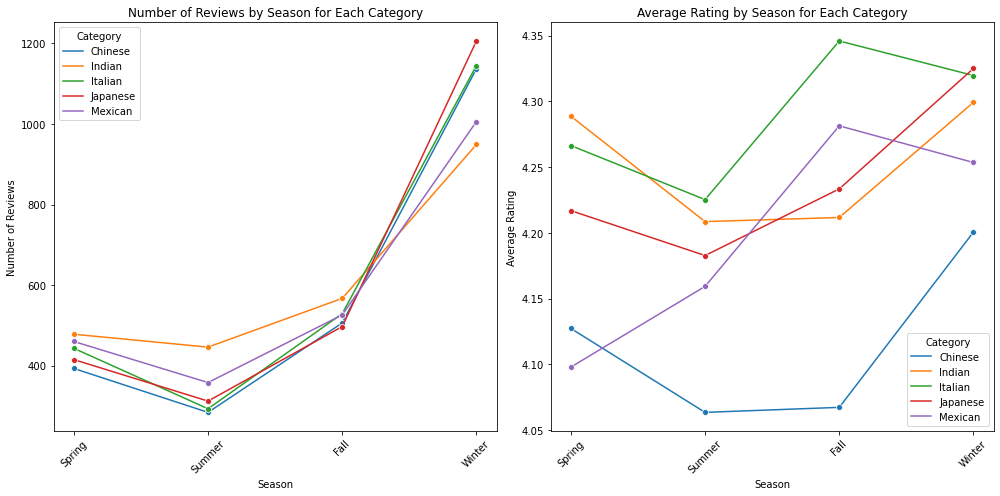

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

season_order = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}
summary['Season Order'] = summary['Season'].map(season_order)
summary_sorted = summary.sort_values(by=['Category', 'Season Order'])

plt.figure(figsize=(14, 7))

# Plot Number of Reviews
plt.subplot(1, 2, 1)
sns.lineplot(data=summary_sorted, x='Season', y='Number of Reviews', hue='Category', marker='o')
plt.title('Number of Reviews by Season for Each Category')
plt.xlabel('Season')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45) 

# Plot Average Rating
plt.subplot(1, 2, 2)
sns.lineplot(data=summary_sorted, x='Season', y='Average Rating', hue='Category', marker='o')
plt.title('Average Rating by Season for Each Category')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()


In [59]:
# Calculating 'Popularity Score' by multiplying 'Number of Reviews' by 'Average Rating'
summary['Popularity Score'] = summary['Number of Reviews'] * summary['Average Rating']


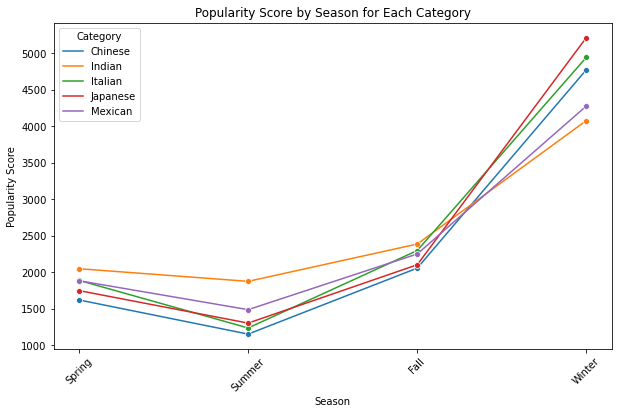

In [60]:

# Ensure seasons are in logical order for plotting
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
summary['Season'] = pd.Categorical(summary['Season'], categories=season_order, ordered=True)

summary_sorted = summary.sort_values(by=['Category', 'Season'])

# Plotting Popularity Score
plt.figure(figsize=(10, 6))
sns.lineplot(data=summary_sorted, x='Season', y='Popularity Score', hue='Category', marker='o')
plt.title('Popularity Score by Season for Each Category')
plt.xlabel('Season')
plt.ylabel('Popularity Score')
plt.xticks(rotation=45) 

plt.show()


In [63]:
import plotly.io as pio 
pio.renderers.default = "notebook"